<a href="https://colab.research.google.com/github/mariatomy9/Major-Project/blob/maria/csv_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.0 MB/s eta 0:00:00


In [ ]:
import mne

In [ ]:

file = "/content/ADERSHBALU~ AD_646ad5ed-cfc7-45a0-b2ac-274a1cc8cf29.edf"
data1 = mne.io.read_raw_edf(file)
raw_data = data1.get_data()
# you can get the metadata included in the file and a list of all channels:


Extracting EDF parameters from /content/ADERSHBALU~ AD_646ad5ed-cfc7-45a0-b2ac-274a1cc8cf29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-5e11c2f10e0d>:2: RuntimeWarning: Omitted 8 annotation(s) that were outside data range.
  data1 = mne.io.read_raw_edf(file)
<ipython-input-3-5e11c2f10e0d>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data1 = mne.io.read_raw_edf(file)


In [ ]:
data1

<RawEDF | ADERSHBALU~ AD_646ad5ed-cfc7-45a0-b2ac-274a1cc8cf29.edf, 26 x 522240 (2040.0 s), ~29 kB, data not loaded>

Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Using matplotlib as 2D backend.


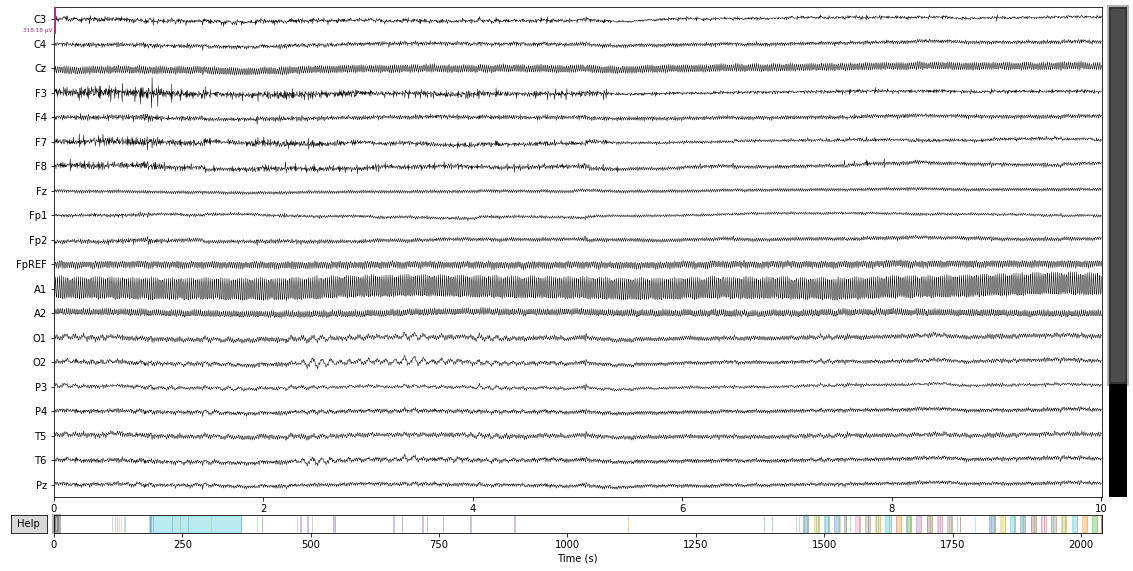

In [ ]:
mne.set_config('MNE_BROWSE_RAW_SIZE','16,8') 
fig=data1.plot(scalings="auto", remove_dc=True)
fig.savefig('')

In [ ]:
# set mne to only output warnings
mne.set_log_level('WARNING')

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print(color.BOLD+color.UNDERLINE+'Interictal'+color.END)
upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print(color.BOLD+color.UNDERLINE+'Ictal'+color.END)
upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)

In [ ]:
!pip install eeglib

In [ ]:
from eeglib.helpers import CSVHelper

helper= CSVHelper("/content/new1.csv")

# for eeg in helper:
#     print(eeg.PFD())
helper

In [ ]:
!pip install pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.6 MB/s eta 0:00:00


In [ ]:
import pyedflib
import numpy as np

file = pyedflib.EdfReader('/content/SANGEETHA~ SAN_2bd862ae-3fb3-4549-a19f-80f1f653ab4f.edf')  
annotations = file.readAnnotations()  
print(annotations)


(array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))


In [ ]:
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('/content/new.csv')
 
# displaying the contents of the CSV file
print(csvFile)

          EB   Stamp    C001    C002    C003    C004    C005    C006    C007  \
0     458839  0.0197 -0.0253  0.0175  0.0133 -0.0064 -0.0066  0.0154  0.0221   
1     458840  0.0276 -0.0173  0.0213  0.0136 -0.0011 -0.0024  0.0263  0.0276   
2     458841  0.0189 -0.0282  0.0074  0.0096 -0.0117 -0.0074  0.0170  0.0231   
3     458842  0.0160 -0.0364 -0.0011  0.0122 -0.0136 -0.0104  0.0133  0.0183   
4     458843  0.0088 -0.0439 -0.0013  0.0136 -0.0133 -0.0136  0.0101  0.0130   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2180  461019 -0.0058 -0.0532 -0.0133  0.0000 -0.0218 -0.0718 -0.0340  0.0117   
2181  461020 -0.0051 -0.0561 -0.0106  0.0093 -0.0186 -0.0667 -0.0324  0.0152   
2182  461021  0.0008 -0.0444  0.0048  0.0072 -0.0173 -0.0601 -0.0253  0.0183   
2183  461022  0.0016 -0.0409  0.0024 -0.0016 -0.0191 -0.0625 -0.0210  0.0138   
2184  461023 -0.0058 -0.0486 -0.0109 -0.0064 -0.0261 -0.0662 -0.0295  0.0098   

        C008  ...    C056    C057    C0

In [ ]:
csvFile.columns

Index(['EB', 'Stamp', '  C001', '  C002', '  C003', '  C004', '  C005',
       '  C006', '  C007', '  C008', '  C009', '  C010', '  C011', '  C012',
       '  C013', '  C014', '  C015', '  C016', '  C017', '  C018', '  C019',
       '  C020', '  C021', '  C022', '  C023', '  C024', '  C025', '  C026',
       '  C027', '  C028', '  C029', '  C030', '  C031', '  C032', '  C033',
       '  C034', '  C035', '  C036', '  C037', '  C038', '  C039', '  C040',
       '  C041', '  C042', '  C043', '  C044', '  C045', '  C046', '  C047',
       '  C048', '  C049', '  C050', '  C051', '  C052', '  C053', '  C054',
       '  C055', '  C056', '  C057', '  C058', '  C059', '  C060', '  C061',
       '  C062', '  C063', '  C064', 'TRIGGER'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt


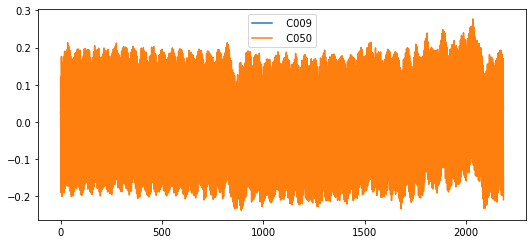

In [ ]:
# l=[]
# for i in range(1,9):
#   l.append('  C00'+str(i))
# for i in range(10,64):
#   l.append('  C0'+str(i))
csvFile[['  C009','  C050']].plot()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('/content/new.csv')

fig = go.Figure(go.Scatter(x = [i for i in range(0,2185)], y = df[['EB', 'Stamp', '  C001', '  C002', '  C003', '  C004',
                                                     '  C005',
       '  C006', '  C007', '  C008', '  C009', '  C010', '  C011', '  C012',
       '  C013', '  C014', '  C015', '  C016', '  C017', '  C018', '  C019',
       '  C020', '  C021', '  C022', '  C023', '  C024', '  C025', '  C026',
       '  C027', '  C028', '  C029', '  C030', '  C031', '  C032', '  C033',
       '  C034', '  C035', '  C036', '  C037', '  C038', '  C039', '  C040',
       '  C041', '  C042', '  C043', '  C044', '  C045', '  C046', '  C047',
       '  C048', '  C049', '  C050', '  C051', '  C052', '  C053', '  C054',
       '  C055', '  C056', '  C057', '  C058', '  C059', '  C060', '  C061',
       '  C062', '  C063', '  C064']],
                  name='Share Prices (in USD)'))

fig.update_layout(title='Apple Share Prices over time (2014)',
                   plot_bgcolor='rgb(230, 230,230)',
                   showlegend=True)

fig.show()

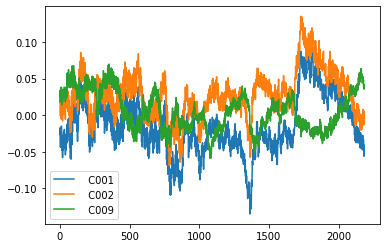

In [ ]:
csvFile[['  C001','  C002','  C009']].plot()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')